<a href="https://colab.research.google.com/github/NIETOCAMBRON7/Simulacion-2/blob/main/Exmen/Ejercicio4_Ex%C3%A1men.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno: Nieto Cambrón Daniel Alejandro
## Boleta: 2015030917
## Fecha: 07 de mayo de 2023
### Primer Examen parcial: Simulación 1

# <font color='blue'>Ejercicio 4</font>
Numero de Lista: 20: Nieto Cambrón Daniel Alejandro 

Ej. 19) Las bombillas eléctricas de un fabricante A tiene una duración media a 1400 horas con una desviación típica de 200 horas, mientras que las de otro fabricante B tiene una duración media de 1200 horas con una desviación típica de 100 horas. Si se toman muestras al azar de 125 bombillas de cada fabricante, 

¿cuál es la probabilidad de que las bombillas de A tengan una duración media que sea al menos

$i$) 160 horas

$ii$) 250 horas 

más quelas bombillas de B?

### a) Resolver por simulación


El código proporcionado realiza una simulación de Monte Carlo para estimar la probabilidad de que la duración media de las bombillas del fabricante A sea al menos **diferencia_minima = 160 y 250** horas mayor que la duración media de las bombillas del fabricante B, con un **nivel_confianza = 0.95**.

El código primero define una funcion llamada: ***probabilidad_duracion_bombillas()***, que recibe como parametros las variables necesarias, como la media y la desviación estándar de la duración de las bombillas de los fabricantes A y B, respectivamente, y el tamaño de muestra n dada en el problema. También se define la *diferencia_minima* que se considera significativa y el *nivel_confianza* para el intervalo de confianza.

Luego, estando en la funcion, se calcula el valor crítico de z para el intervalo de confianza utilizando la función norm.ppf(). 

Después, se ejecuta el experimento un millón de veces. En cada iteración, se generan dos muestras aleatorias de n bombillas cada una de los fabricantes A y B, utilizando la función np.random.normal(). Se calcula la diferencia de las medias de duración de las bombillas y se verifica si la diferencia es mayor o igual a la diferencia_minima que se considera significativa. Si es así, se incrementa el contador de éxitos.

In [ ]:
from scipy.stats import norm
import numpy as np

def probabilidad_duracion_bombillas(diferencia_minima, nivel_confianza, media_a=1400, std_a=200, media_b=1200, std_b=100, n=125, num_simulaciones=50000):
    contador_exitos = 0
    
    # Calcular el valor crítico de z
    SE = np.sqrt((std_a**2/n) + (std_b**2/n))
    z_critico = norm.ppf((1 + nivel_confianza) / 2)

    # Ejecutar el experimento cien mil veces
    for i in range(num_simulaciones):
        # Generar dos muestras aleatorias de 125 bombillas cada una de los fabricantes A y B
        muestras_a = np.random.normal(loc=media_a, scale=std_a, size=n)
        muestras_b = np.random.normal(loc=media_b, scale=std_b, size=n)

        # Calcular la diferencia de las medias de duración de las bombillas
        diferencia_medias = np.mean(muestras_a) - np.mean(muestras_b)

        # Verificar si la diferencia es mayor o igual a la diferencia mínima que se considera significativa
        if diferencia_medias >= diferencia_minima:
            contador_exitos += 1

    # Calcular la probabilidad de que la duración media de las bombillas del fabricante A sea al menos `diferencia_minima` mayor que la duración media de las bombillas del fabricante B
    probabilidad_exitos = contador_exitos / num_simulaciones
    intervalo_confianza = (probabilidad_exitos - z_critico*np.sqrt((probabilidad_exitos*(1-probabilidad_exitos))/num_simulaciones), probabilidad_exitos + z_critico*np.sqrt((probabilidad_exitos*(1-probabilidad_exitos))/num_simulaciones))

    return probabilidad_exitos, intervalo_confianza


Finalmente, el código calcula la probabilidad de éxito y el intervalo de confianza utilizando el contador de éxitos, el número de simulaciones, y el valor crítico de z, y las retorna a los valores indicados cuando se invoca a la función.

En resumen, el código proporcionado realiza una simulación de Monte Carlo para estimar la probabilidad de que la duración media de las bombillas del fabricante A sea al menos ***diferencia_minima*** horas mayor que la duración media de las bombillas del fabricante B, con un nivel de confianza del ***nivel_confianza***. El intervalo de confianza se calcula utilizando el método del valor crítico de z.

Ahora bien modificando un poco el codigo anterior, podemos graficar de la siguiente manera, para ver que la probabilidad converge al valor calculado, Guarda en un arreglo llamado: **probabilidad_exitos[i]** las probabilidades calculadas y los muestra en la grafica, mientras que las lineas rojas, indican el intervalo de confianza de 95%.

In [ ]:
import matplotlib.pyplot as plt

def probabilidad_diferencia_medias(diferencia_minima):
    from scipy.stats import norm
    import numpy as np

    # Definir todas las variables necesarias
    media_a = 1400
    std_a = 200
    media_b = 1200
    std_b = 100
    n = 125
    nivel_confianza = 0.95
    contador_exitos = 0
    num_simulaciones = 50000

    # Calcular el valor crítico de z
    SE = np.sqrt((std_a**2/n) + (std_b**2/n))
    z_critico = norm.ppf((1 + nivel_confianza) / 2)

    # Ejecutar el experimento un millón de veces
    probabilidad_exitos = np.zeros(num_simulaciones)
    for i in range(num_simulaciones):
        # Generar dos muestras aleatorias de 125 bombillas cada una de los fabricantes A y B
        muestras_a = np.random.normal(loc=media_a, scale=std_a, size=n)
        muestras_b = np.random.normal(loc=media_b, scale=std_b, size=n)

        # Calcular la diferencia de las medias de duración de las bombillas
        diferencia_medias = np.mean(muestras_a) - np.mean(muestras_b)

        # Verificar si la diferencia es mayor o igual a la diferencia mínima que se considera significativa
        if diferencia_medias >= diferencia_minima:
            contador_exitos += 1

        # Calcular la probabilidad de éxito hasta este punto
        probabilidad_exitos[i] = contador_exitos / (i+1)

    # Calcular el intervalo de confianza
    intervalo_confianza = (probabilidad_exitos[-1] - z_critico*np.sqrt((probabilidad_exitos[-1]*(1-probabilidad_exitos[-1]))/(num_simulaciones)), probabilidad_exitos[-1] + z_critico*np.sqrt((probabilidad_exitos[-1]*(1-probabilidad_exitos[-1]))/(num_simulaciones)))

    # Graficar la convergencia de la probabilidad de éxito
    plt.plot(np.arange(num_simulaciones), probabilidad_exitos)
    plt.axhline(y=intervalo_confianza[0], color='r', linestyle='-')
    plt.axhline(y=intervalo_confianza[1], color='r', linestyle='-')
    plt.title(f"Convergencia de la probabilidad para una diferencia mínima de {diferencia_minima}")
    plt.xlabel("Número de simulaciones")
    plt.ylabel("Probabilidad de éxito")
    plt.show()

    return probabilidad_exitos[-1], intervalo_confianza


### $i$) ¿Cuál es la probabilidad de que las bombillas de A tengan una duración media que sea al menos 160 horas más que las bombillas de B?

La probabilidad de que la duración media de las bombillas del fabricante A sea al menos 160 horas mayor que la duración media de las bombillas del fabricante B es: 0.97722
Intervalo de confianza al 95.0%: (0.9762952568472493, 0.9781447431527507)


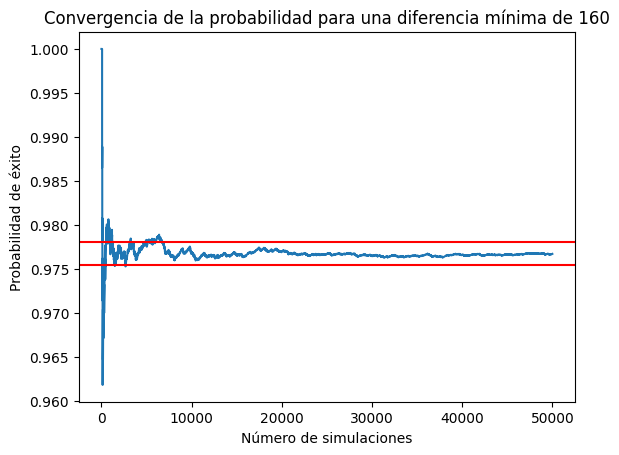

In [ ]:
probabilidad, intervalo = probabilidad_duracion_bombillas(diferencia_minima=160,nivel_confianza=0.95)

print(f"La probabilidad de que la duración media de las bombillas del fabricante A sea al menos 160 horas mayor que la duración media de las bombillas del fabricante B es: {probabilidad}")
print(f"Intervalo de confianza al {nivel_confianza*100}%: {intervalo}")
P,Int = probabilidad_diferencia_medias(160)

Asi concluimos que la probabilidad de que las bombillas de A tengan una duracion media que sea al menos 160 horas mas que las bombillas B es de $P = 0.97722$ lo equivalente a $P = 97.722\%$ y que ademas, la gráfica anterior muestra su convergencia.

### $ii$) ¿Cuál es la probabilidad de que las bombillas de A tengan una duración media que sea al menos 250 horas más que las bombillas de B?

La probabilidad de que la duración media de las bombillas del fabricante A sea al menos 250 horas mayor que la duración media de las bombillas del fabricante B es: 0.00624
Intervalo de confianza al 95.0%: (0.005751931092424905, 0.006728068907575095)


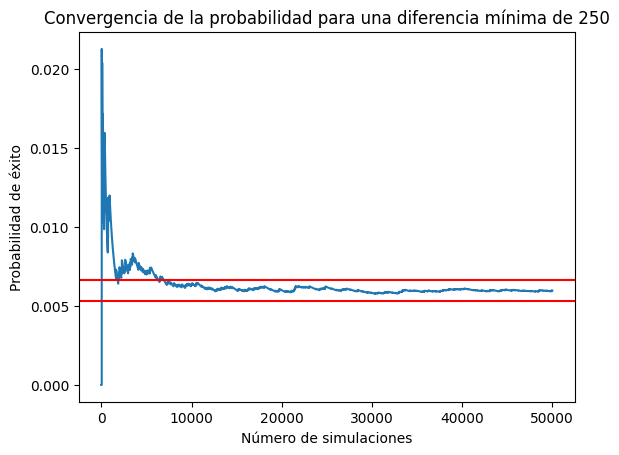

In [ ]:
probabilidad, intervalo = probabilidad_duracion_bombillas(diferencia_minima=250,nivel_confianza=0.95)

print(f"La probabilidad de que la duración media de las bombillas del fabricante A sea al menos 250 horas mayor que la duración media de las bombillas del fabricante B es: {probabilidad}")
print(f"Intervalo de confianza al {nivel_confianza*100}%: {intervalo}")

P,Int = probabilidad_diferencia_medias(250)

Notese, como en ambos casos el numero de simulaciones no excede de 50mil, sin embargo entre mayor sea este numero de iteraciones, se puede decir que mas exacto se hace el valor de nuestra probabilidad.

Asi concluimos, que la probabilidad de que las bombillas de A tengan una duracion media que sea al menos 250 horas mas que las bombillas B es de $P = 0.00624$ lo equivalente a $P = 0.624\%$ y que ademas, la gráfica anterior muestra su convergencia.

### a) Resolver Analíticamente


Denótese por $\bar{X}_A$ y $\bar{X}_B$ las duraciones medias de las muestras A y B, respectivamente. Entonces, por el teorema del límite central, la variable tipificada para la diferencia de medias es:

$$Z = \frac{(\bar{X}_A - \bar{X}_B) - (\mu_A - \mu_B)}{\sqrt{\frac{\sigma_A^2}{n_A} +\frac{\sigma_B^2}{n_B}}  }$$

donde $\mu_A$, $\mu_B$, $\sigma_A$, $\sigma_B$ son las medias y desviaciones típicas de las poblaciones $A$ y $B$, respectivamente, y $n_A = n_B = 125$ es el tamaño de las muestras.

Como se desconocen los valores poblacionales, se utilizan las estimaciones muestrales de las desviaciones estándar:

$$Z = \frac{(\bar{X}_A - \bar{X}_B) - (\mu_A - \mu_B)}{\sqrt{\frac{s_A^2}{n_A} +\frac{s_B^2}{n_B}}  }$$

donde $s_A = 200$ y $s_B = 100$ son las desviaciones típicas muestrales.

### $i$) ¿Cuál es la probabilidad de que las bombillas de A tengan una duración media que sea al menos 160 horas más que las bombillas de B?

La diferencia de 160 horas en unidades tipificadas es:

$(\bar{X}_A - \bar{X}_B)$ $=$ $160$

Asi, entonces:

$$Z = \frac{(160) - (\mu_A - \mu_B)}{\sqrt{\frac{s_A^2}{n_A} +\frac{s_B^2}{n_B}}  }  = \frac{(160) - (1400 - 1200)}{\sqrt{\frac{200^2}{125} +\frac{100^2}{125}}  }  =  \frac{-40}{\sqrt{400}} = -2$$

La probabilidad pedida es el área bajo la curva normal a la derecha de $Z = -2$:

$$ P(\bar{X}_A - \bar{X}_B \geq 160) = P(Z \geq -2) = 0.5 + 0.4772 = 0.9772 $$

Lo que es equivalente a decir que:

$$P(\bar{X}_A - \bar{X}_B \geq 160) = 97.722\%$$

Este valor indica la probabilidad de que la duración media de las bombillas del fabricante A sea al menos 160 horas mayor que la duración media de las bombillas del fabricante B, es decir, $P(\bar{X}_A - \bar{X}_B \geq 160)$. Esto significa que si tomamos muestras aleatorias de 125 bombillas de cada fabricante y calculamos la diferencia de medias, en el 97.72% de los casos la duración media de las bombillas del fabricante A será al menos 160 horas mayor que la duración media de las bombillas del fabricante B.

En otras palabras, hay una alta probabilidad de que las bombillas del fabricante A tengan una duración media mayor que las del fabricante B.

### $ii$) ¿Cuál es la probabilidad de que las bombillas de A tengan una duración media que sea al menos 250 horas más que las bombillas de B?

La diferencia de 250 horas en unidades tipificadas es:

$(\bar{X}_A - \bar{X}_B)$ $=$ $250$

Asi, entonces:

$$Z = \frac{(250) - (\mu_A - \mu_B)}{\sqrt{\frac{s_A^2}{n_A} +\frac{s_B^2}{n_B}}  }  = \frac{(250) - (1400 - 1200)}{\sqrt{\frac{200^2}{125} +\frac{100^2}{125}}  }  =  \frac{50}{\sqrt{400}} = 2.5$$

\begin{align*}
\text{Probabilidad pedida} &= (\text{area bajo la curva normal a la derecha de } z = 2.50) \
\end{align*}

$$ P(\bar{X}_A - \bar{X}_B \geq 250) = P(Z \geq 2.50) = 0.5 - 0.4938 =  0.0062 $$

Lo que es equivalente a decir que:

$$P(\bar{X}_A - \bar{X}_B \geq 250) = 0.62\%$$

Esto indica que es muy poco probable que las bombillas de A tengan una duración media tan significativamente mayor que las de B.

Finalmente, concluimos que el valor obtenido en nuestra simulación en el inciso a) es totalmente acertado con relacion al analisis analítico del inciso b)...$qed$